In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as sim

def linfit(x,y):
    n=len(x)
    sx=sum(x)
    sy=sum(y)
    sxy=sum(x*y)
    sxx=sum(x**2)
    
    a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
    b=(sx*sy-n*sxy)/(sx**2-n*sxx)
    
    return a,b

def rsquared(x,y,yfit):
    ymean=np.mean(y)
    sstot=sum((y-ymean)**2)
    ssres=sum((y-yfit)**2)
    rs=1-ssres/sstot
    return rs

# function powerfit
# input data sets x and y
# output fit constants A, n, and coefficient of determination
# fit would be y=Ax^n

def powerfit(x,y):
    mod_y=np.log(y)
    mod_x=np.log(x)
    a,b=linfit(mod_x,mod_y)
    return np.exp(a),b,rsquared(x,y,np.exp(a)*x**b)

Part A

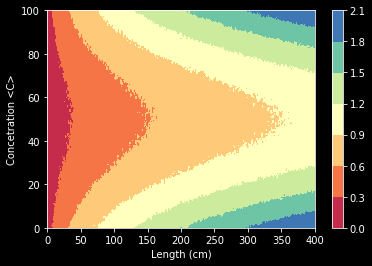

(101, 401)

In [84]:
x = np.loadtxt('channeldata.csv',delimiter=',')      #importing csv data 
plt.contourf(x,cmap='Spectral')                     #because two dimensional, need to represent as contour

ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)
plt.colorbar()
plt.xlabel('Length (cm)')
plt.ylabel('Concetration <C>')
plt.show()
x.shape

Part B

In [52]:
#B:
channel = np.loadtxt('channeldata.csv',delimiter=',')  #import data for mean plot
mean_channel = np.mean(channel, axis=0)             #isolate only concentration data
powerfit(xx[1:], mean_channel[1:])                 #input data sets x and y
#output the fit constants A, n, and coefficient of determination, use A & n for mean plotting

(0.6785387879468003, 0.499876389679529, 0.999964135252378)

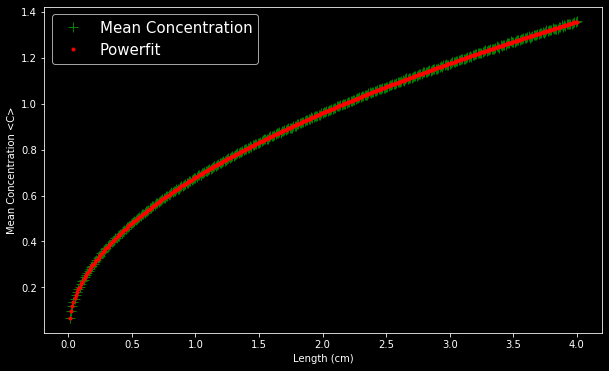

In [95]:
#Constants from the powerfit
A = 0.6785387879468003
n = 0.499876389679529

fit = lambda x: A*x**(n)       #powerfit equation 

plt.figure(figsize=(10,6))

plt.plot(xx[1:],mean_channel[1:],'g+',markersize=10, label="Mean Concentration")
plt.plot(xx[1:], fit(xx[1:]),'ro', markersize=3, label="Powerfit")
plt.legend()
plt.legend(loc=2, prop={'size': 15})
plt.ylabel("Mean Concentration <C>")
plt.xlabel("Length (cm)")
plt.style.use('dark_background')
plt.show()

Part C

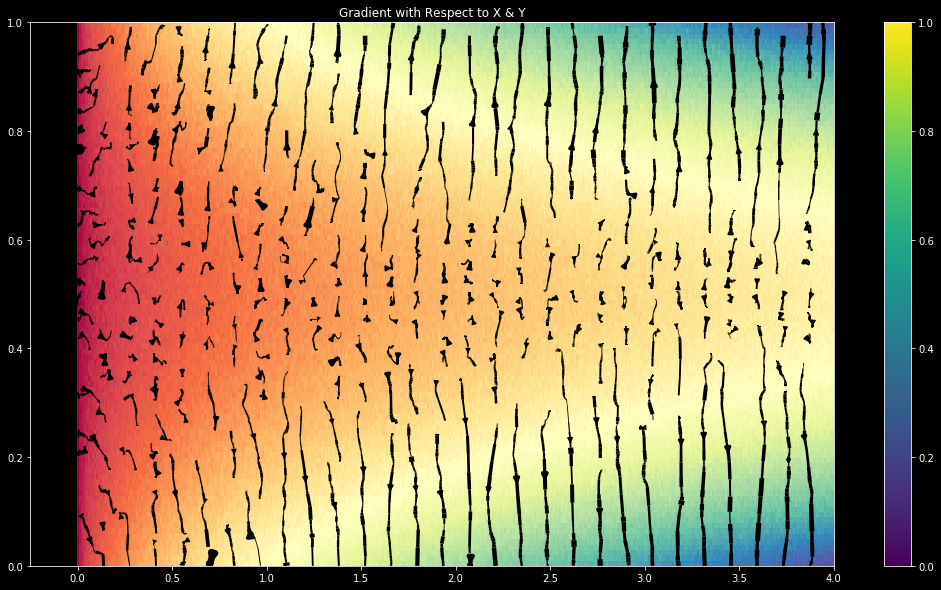

In [74]:
#the real part C
#C
#dding a streamplot to see how this goes
#Uncomment the bottom and run it.
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(18,10))
plt.pcolormesh(xx,yy,x,cmap ='Spectral')
plt.streamplot(x_n,y_n,dx,dy,linewidth=1*sqrxy,color='k')
plt.title('Gradient with Respect to X & Y')
plt.colorbar()
plt.show()


In [78]:
# (C) The Gradient of the file.
x = np.loadtxt('channeldata.csv',delimiter=',')
ny,nx = x.shape
xx = np.linspace(0,4,nx)
yy = np.linspace(0,1,ny)

In [55]:
xn = np.linspace(0,4,nx)
yn = np.linspace(0,1,ny)

In [56]:
#x derivatives
xd = xn[1]-xn[0]
dCdx = np.zeros(x.shape)

#First point
dCdx[:,0]= (-3*x[:,0] +4*x[:,1]- x[:,2])/(2*xd)
#Last point
dCdx[:,-1]= (3*x[:,-1] -4*x[:,-2] + x[:,-3])/(2*xd)

#All other columns
dCdx[:,1:-1]=(x[:,2:]-x[:,:-2])/(2*xd)

In [57]:
#Y Derivatives 
yd = yn[1] - yn[0]
dCdy = np.zeros(x.shape)

#The first point
dCdy[0,:] = (-3*x[0,:] +4*x[1,:]- x[2,:])/(2*yd)
#The last point
dCdy[-1,:]= (3*x[-1,:]-4*x[-2,:] + x[-3,:])/(2*yd)
#All other vectorized points
dCdy[1:-1,:] = (x[2:,:] -x[:-2,:])/(2*yd)

In [79]:
#Derivatives Completed
x_n, y_n = np.meshgrid(xn,yn)
#X&Y are done
xd = xn[1]-xn[0]
dx = dCdx
dy = dCdy


Part D

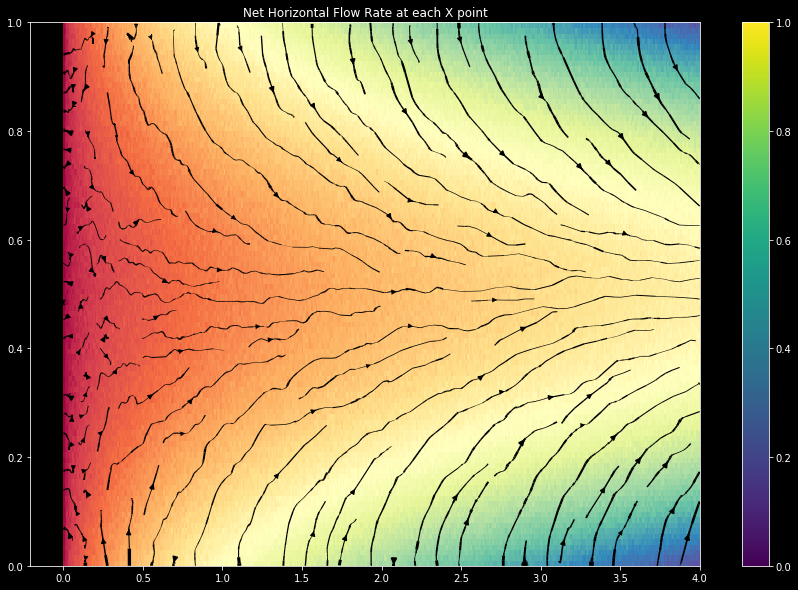

In [97]:
#D
sqrxy = (dx**2 +dy**2)**(1/2)
plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,x,cmap ='Spectral')
plt.streamplot(x_n,y_n,dx*(-0.1)+((4*y_n)*(1-y_n)*x),dy*(-0.1),linewidth=0.5*sqrxy,color='k')  
#qx and qy are multiplied by the dx and dy respectively
plt.colorbar()
plt.title("Net Horizontal Flow Rate at each X point")
plt.show()

Part E

Text(0, 0.5, 'Vertical Distance (cm)')

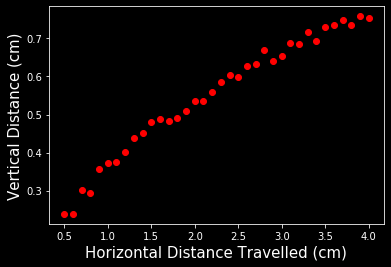

In [103]:
#E
#Trap Rule
def trapz(y,x):
    # determine spacing array
    h=x[1]-x[0]
    
    # sum of h x non-end points
    I=sum(h*y[1:-1])
    
    # add one-half h x end points
    I+=(y[0]+y[-1])*h/2
    
    return I

#E (continued)
#We can use Newton Law of approximation to find where the y point hits the x horizontal.
# That's the length of the channel
# That was quick


x22 = np.arange(50,401,10)
#Representing the sum
qx = dx*(-0.1)+((4*y_n)*(1-y_n)*x)
t=[]
for i in range(len(x22)):   
    t1=trapz(qx[:,x22[i]],yy)
    t.append(t1)
plt.style.use('dark_background')
plt.plot(x22/100,t,'ro')  
plt.xlabel('Horizontal Distance Travelled (cm)', fontsize='15')
plt.ylabel('Vertical Distance (cm)', fontsize ='15')